# Spam Classifier

Build a spam detector using 4 Machine Learning models and evaluate them with test data using different performance metrics used. The dataset contain both spam and ham messages in different proportions, which we converted stemming. As per our analysis, Naive Bayes model and Random Forest models worked well for spam detection, whereas SVM performed the poorest among the 4 models.

Trained four models using the training data:

    a.  Naive Bayes
    b.  Decision Tree
    c.  SVM
    d.  Random Forest

In [1]:
import nltk
import pandas as pd

In [7]:
df = pd.read_csv('C:/Users/User/Desktop/19Nov/21/NLP/spam.txt', sep='\t', names = ['label','message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [15]:
obj = PorterStemmer()
corpus = []

for i in range(len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['message'][i])
    review = review.lower()
    review = review.split()
    review = [obj.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    
#Creating Bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()     #X forms independednt variables her

In [16]:
X.shape

(5572, 6296)

In [17]:
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray() 
X.shape

(5572, 5000)

In [18]:
X   #INDEPENDENT DATA

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
# DEPENDENT DATA 
df   

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [28]:
y3 = pd.get_dummies(df['label'])
y3 = y3.iloc[:,1].values

In [29]:
y3   # DEPENDENT VARIABLE

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y3,test_size=0.2, random_state=0)

In [52]:
#function which takes in y test value and y predicted value and prints the associated model performance metrics
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def model_assessment(y_test,predicted_class):
    print('confusion matrix')
    print(confusion_matrix(y_test,predicted_class))
    print('accuracy')
    print(accuracy_score(y_test,predicted_class))
    print('precision')
    print(precision_score(y_test,predicted_class,pos_label=1))
    print('recall')
    print(recall_score(y_test,predicted_class,pos_label=1))
    print('f-Score')
    print(f1_score(y_test,predicted_class,pos_label=1))
    print('AUC')
    print(roc_auc_score(np.where(y_test==1,1,0),np.where(predicted_class==1,1,0)))
    plt.matshow(confusion_matrix(y_test, predicted_class), cmap=plt.cm.binary, interpolation='nearest',)
    plt.title('confusion matrix')
    plt.colorbar()
    plt.ylabel('expected label')
    plt.xlabel('predicted label')

# Naive Bayes model

In [33]:
from sklearn.naive_bayes import MultinomialNB
modelNB = MultinomialNB()
modelNB.fit(X_train, y_train)
predicted_class_NB = modelNB.predict(X_test)

confusion matrix
[[946   9]
 [  8 152]]
accuracy
0.9847533632286996
precision
0.9440993788819876
recall
0.95
f-Score
0.9470404984423676
AUC
0.9702879581151832


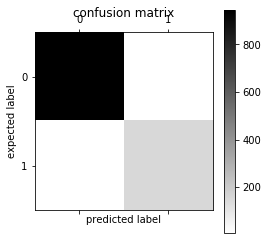

In [53]:
model_assessment(y_test,predicted_class_NB)

# Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC, LinearSVC

In [55]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train,y_train)
predicted_class_tree = model_tree.predict(X_test)

confusion matrix
[[950   5]
 [ 13 147]]
accuracy
0.9838565022421525
precision
0.9671052631578947
recall
0.91875
f-Score
0.9423076923076922
AUC
0.9567571989528796


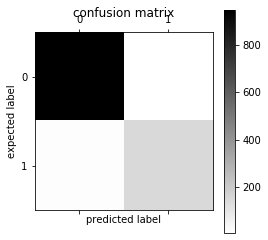

In [56]:
model_assessment(y_test,predicted_class_tree)

# Support Vector machine 

In [57]:
from sklearn.svm import SVC, LinearSVC

In [62]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
predicted_class_svm = model_svm.predict(X_test)

confusion matrix
[[955   0]
 [ 19 141]]
accuracy
0.9829596412556054
precision
1.0
recall
0.88125
f-Score
0.93687707641196
AUC
0.940625


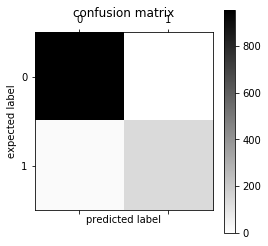

In [63]:
model_assessment(y_test,predicted_class_svm)

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=20, criterion='entropy')
model_rf.fit(X_train, y_train)
predicted_class_rf = model_rf.predict(X_test)

confusion matrix
[[955   0]
 [ 24 136]]
accuracy
0.97847533632287
precision
1.0
recall
0.85
f-Score
0.9189189189189189
AUC
0.925


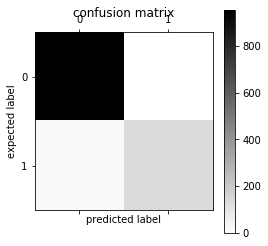

In [64]:
model_assessment(y_test,predicted_class_rf)